In [1]:
import pandas as pd
import geopandas as gpd
import networkx as nx

import matplotlib.pyplot as plt

from utils import networkx_graph_to_gdf

In [11]:
ae_emb = gpd.read_file("../data/embeddings_alpha_earth.gpkg")
ae_emb = gpd.GeoDataFrame(ae_emb, geometry=gpd.points_from_xy(ae_emb.lon, ae_emb.lat), crs="EPSG:4326")

poi_graph = nx.read_gexf("../data/grafo_OSM/grafo_santiago_filtrado.gexf")
poi = networkx_graph_to_gdf(poi_graph)

comunas = gpd.read_file("../data/comunas_filtradas.gpkg")
comunas = comunas.to_crs("EPSG:4326")

if ae_emb.crs != poi.crs:
    print("a")
    poi = poi.to_crs(ae_emb.crs)
    comunas = comunas.to_crs(ae_emb.crs)

In [12]:
ae_emb.head(1)

,A00,A01,A02,A03,A04,A05,A06,A07,A08,A09,...,A58,A59,A60,A61,A62,A63,lon,lat,Comuna,geometry
0,-0.119093,0.010396,0.206936,0.113741,-0.228897,-0.166336,0.071111,0.284444,-0.041584,-0.017778,...,-0.27614,-0.103406,0.079723,-0.055363,-0.013841,0.041584,-70.641807,-33.573943,La Pintana,POINT (-70.64181 -33.57394)


In [13]:
poi.head(1)

,node_id,lat,lon,tipo,nombre,geometry
0,386313,-33.439551,-70.651114,comercio,Lentes Online,POINT (-70.65111 -33.43955)


In [14]:
comunas.head(1)

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry
0,330,13987.326781,10,7,13129,13,1.424341e+07,16812.167615,Región Metropolitana de Santiago,San Joaquín,Santiago,"POLYGON ((-70.62342 -33.47338, -70.62292 -33.4..."


/var/folders/w5/kmvyzkpj2q1fyf7tnn3nqwb40000gn/T/ipykernel_51231/3900686658.py:5: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


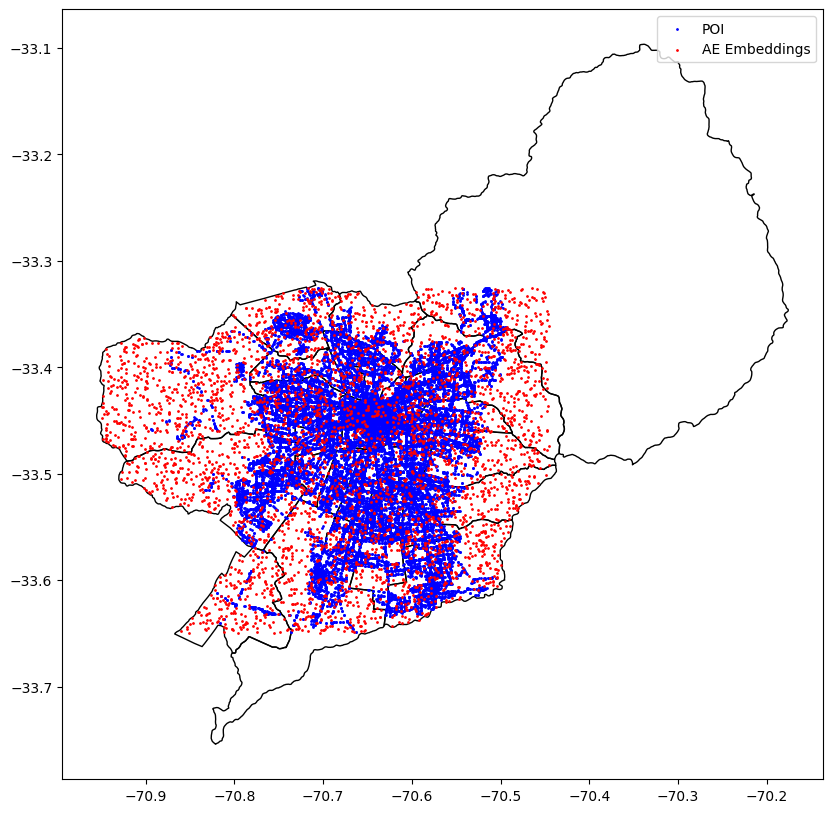

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
comunas.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1, label="Comunas Boundaries")
poi.plot(ax=ax, color="blue", markersize=1, label="POI")
ae_emb.plot(ax=ax, color="red", markersize=1, label="AE Embeddings")
plt.legend()